# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [30]:
data.head()
data.to_excel('Race_job.xlsx')

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

<h2>1. What test is appropriate for this problem? Does CLT apply?</h2>
<h3>Solution:</h3>

   1. Plot ecdfs for the whole data set, for black and for white sounding names and see the distribution
   2.  Since sample size is large enough that CLT should apply. i.e. if you keep sampling with replacement and find the mean number of callbacks you will get a  normal distributioin



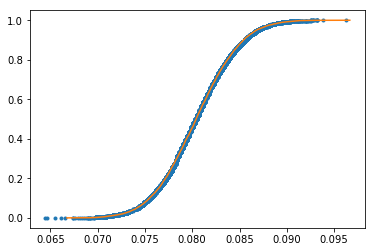

In [9]:
#Computing mean proportion of all callbacks. Construct bootstrap samples from the whole callback data and then plotting
#actual and historical ecdf. This shows that the mean of callbacks does follow a normal distritbution.

import numpy as np
import matplotlib.pyplot as plt
def bootstrap_replicate_1d(data,func):
    return func(np.random.choice(data,len(data)))

def draw_bs_reps(data,func,size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
    return bs_replicates    

def ecdf(data):
    x=np.sort(data)
    n=len(data)
    y=np.arange(1,n+1)/n
    return(x,y)


mean_reps = draw_bs_reps(data['call'],np.mean,10000)
x,y = ecdf(mean_reps)
mean = np.mean(mean_reps)
std = np.std(mean_reps)
samples = np.random.normal(mean,std,size=10000)
x_theor,y_theor=ecdf(samples)
_= plt.plot(x,y,marker='.',linestyle='none')
_= plt.plot(x_theor,y_theor)
plt.show()

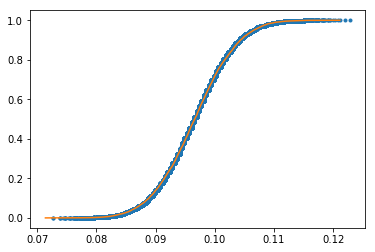

In [11]:
#Repeating bootstrap sampling for callbacks for white sounding names. 
#This also follows a normal distribution
mean_reps = draw_bs_reps(data['call'][data['race']=='w'],np.mean,100000)
x,y = ecdf(mean_reps)
mean = np.mean(mean_reps)
std = np.std(mean_reps)
samples = np.random.normal(mean,std,size=10000)
x_theor,y_theor=ecdf(samples)
_= plt.plot(x,y,marker='.',linestyle='none')
_= plt.plot(x_theor,y_theor)
plt.show()

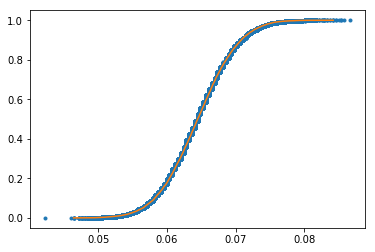

In [8]:
#Repeating bootstrap sampling for callbacks for black sounding names. 
#This also follows a normal distribution
mean_reps = draw_bs_reps(data['call'][data['race']=='b'],np.mean,100000)
x,y = ecdf(mean_reps)
mean = np.mean(mean_reps)
std = np.std(mean_reps)
samples = np.random.normal(mean,std,size=10000)
x_theor,y_theor=ecdf(samples)
_= plt.plot(x,y,marker='.',linestyle='none')
_= plt.plot(x_theor,y_theor)
plt.show()

<h2> 2. What are the null and alternate hypothesis? </h2>

<h3>Solution: </h3>
The null hypothesis is that the proportion of callbacks for black and for white sounding names is the same. The alternate hypothesis is that the proportion of callbacks for the different race is not the same.</h3>

<h3> Constructing hypothesis test for two independent samples with dichotomous outcome</h3>
 <h4>Step 1: Set up hypothesis and determine level of significance</h4>
     H0: p1=p2    
     H1:p1!=p2    
     alpha = 0.05
     
 <h4>Step 2: Select appropriate test statistic</h4>
    <p>We must first check that the sample size is adequate. Specifically we need to ensure that we have at least 5 successes and 5 failures in each comparison group. In this example we have more than enough successes and failures in each comparisong group. The sample size is more than adequate so the following formula can be used:</p>
    Z = (p1 - p2) / np.sqrt( p(1-p)(1/n1 + 1/n2) )
    
 <h4>Step 3: Set up Decision rule</h4>
     Reject H0 if Z <= -1.960 or if Z >= 1.960
  
 <h4>Step 4: Compute the statistic</h4>
     Z = -4.10841215243
 
 <h4>Step 5: Conclusion</h4>
     We reject the null hypothesis because -4.108 <= -1.960 . We have statistically significant evidence at alpha 0.05
     to show that there is a difference in the proportions of callbacks between black and white sounding names
     

In [13]:
callback_b = sum(data[data.race=='b'].call)
callback_w = sum(data[data.race=='w'].call)
nb = len(data[data.race=='b'])
nw = len(data[data.race=='w'])
pb = callback_b/sample_callback_b #p1
pw = callback_w/sample_callback_w #p2
p_all = sum(data.call)/len(data.call) #p
print("Proportion of black sounding names called back: ",pb*100)
print("Proportion of white sounding names called back: ",pw*100)
print("Proportion of callbacks overall: ",p_all*100)
Z = (pb-pw)/ np.sqrt( p_all*(1-p_all)*((1/nb)+(1/nw)))
print(Z)

Proportion of black sounding names called back:  6.4476386037
Proportion of white sounding names called back:  9.65092402464
Proportion of callbacks overall:  8.04928131417
-4.10841215243


<h2> 3. Compute margin of error, confidence interval, and p-value.</h2>


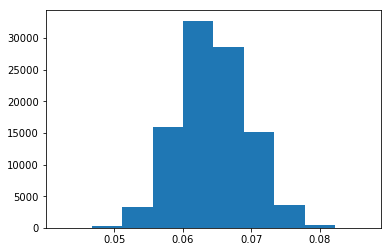

Sample - P hat: 0.0804974743746
Data proportion: 0.0804928131417
Check if np > 10 : 392.0
Check if n(1-p) > 10: 4478.0
Standard error of the mean:  0.00389844701809
Margin of error = Z_critical * SEM : 0.00764095615545
Proportion of confidence intervals that do not contain the sample mean:  0.0465


In [34]:
plt.hist(mean_reps)
plt.show()

#Step 1: Obtain 10000 random samples and draw proportion
sample_proportion = draw_bs_reps(data['call'],np.mean,10000)
sample_proportion_mean = np.mean(sample_proportion)
data_proportion = sum(data['call'])/len(data['call'])
print("Sample - P hat:",sample_proportion_mean)
print("Data proportion:",data_proportion)
print("Check if np > 10 :",data_proportion*len(data['call']))
print("Check if n(1-p) > 10:",(1-data_proportion)*len(data['call']))
print("Standard error of the mean: ", np.sqrt( (data_proportion*(1-data_proportion))/len(data['call'])))
print("Margin of error = Z_critical * SEM :",1.96*np.sqrt( (data_proportion*(1-data_proportion))/len(data['call'])))

#We have 10,000 samples of size 4870. Therefore our sample size is 4870
#Now we can use one of the samples to construct a confidence interval
z_critical = 1.96
count_incorrect_intervals = 0
sem = np.empty_like(sample_proportion)
margin_of_error = np.empty_like(sample_proportion)
confidence_interval = np.empty([len(sample_proportion),2])
for i,x in enumerate(sample_proportion):
    sem[i] = np.sqrt((x*(1-x))/4870)
    margin_of_error[i] = z_critical*sem[i]
    confidence_interval[i] = [sample_proportion[i]-margin_of_error[i], sample_proportion[i]+margin_of_error[i]]
    if (data_proportion < confidence_interval[i][0]) or (data_proportion > confidence_interval[i][1]):
        count_incorrect_intervals +=1

print("Proportion of confidence intervals that do not contain the sample mean: ",count_incorrect_intervals/10000)
    


<h2> 4. Write a story describing the statistical significance in the context or the original problem.</h2>

<h3> Solution: </h3>
Given the p value that is much less than 0.01, there is statisitically significant difference between the number of callbacks received by black vs white sounding names. Such a small p value indicates that probability of obtaining such extreme results is very unlikely to happen by chance.



In [35]:
def diff_of_means(data1, data2):
    return(np.mean(data1)-np.mean(data2))

def permutation_sample(data1,data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_data1 = permuted_data[:len(data1)]
    perm_sample_data2 = permuted_data[len(data1):]
    return perm_sample_data1,perm_sample_data2

def draw_perm_reps(data1,data2,func,size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1,perm_sample_2 = permutation_sample(data1,data2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
    return perm_replicates

data1 = np.array(data['call'][data['race']=='w'])
data2 = np.array(data['call'][data['race']=='b'])
empiricial_diff = diff_of_means(data1,data2)
bs_replicates = draw_perm_reps(data1,data2,diff_of_means,size=100000)
p = np.sum(bs_replicates>=empiricial_diff)/100000
print(p)

2e-05


<h2>5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?</h2>

<p>Analyzing other factors like sex, race, volunteer, city, kind - it seems that city has the most significant effect on the outcome. We can explore the importance of more predictor variables to be sure. Based on the logistic regression results race is a significant predictor variable after city. </p>



In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
regression_callback = logit("call ~ sex + race + volunteer + city + kind", data).fit()
print(regression_callback.summary())
print(regression_callback.params)

Optimization terminated successfully.
         Current function value: 0.275433
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   call   No. Observations:                 4870
Model:                          Logit   Df Residuals:                     4864
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Nov 2017   Pseudo R-squ.:                 0.01621
Time:                        14:12:11   Log-Likelihood:                -1341.4
converged:                       True   LL-Null:                       -1363.5
                                        LLR p-value:                 2.104e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1965      0.132    -16.686      0.000      -2.455      -1.939
sex[T.m]      -0.0461      0.

In [61]:
def diff_of_means(data1, data2):
    return(np.mean(data1)-np.mean(data2))

def permutation_sample(data1,data2):
    data = np.concatenate((data1,data2))
    permuted_data = np.random.permutation(data)
    perm_sample_data1 = permuted_data[:len(data1)]
    perm_sample_data2 = permuted_data[len(data1):]
    return perm_sample_data1,perm_sample_data2

def draw_perm_reps(data1,data2,func,size=1):
    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1,perm_sample_2 = permutation_sample(data1,data2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)
    return perm_replicates

data1 = np.array(data['call'][data['city']=='b'])
data2 = np.array(data['call'][data['city']=='c'])
empiricial_diff = diff_of_means(data1,data2)
bs_replicates = draw_perm_reps(data1,data2,diff_of_means,size=100000)
p = np.sum(bs_replicates>=empiricial_diff)/100000
print(p)

0.00013
